In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

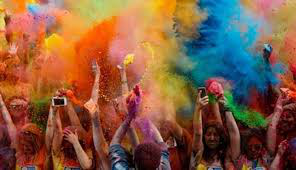

In [43]:
# Reads in BGR format by default
img_bgr = cv2.imread('images/holi.jpeg')
cv2_imshow(img_bgr)

In [44]:
# Convert to RGB color space
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [45]:
# Converting image from shape `w,h,c` to `w*h,c`. 3-d to 2-d
# Float conversion required for k-means
img_vector = np.float32(img_rgb.reshape(-1,3)) 
print(img_rgb.shape)
print(img_vector.shape)

(170, 296, 3)
(50320, 3)


In [46]:
# Clustering
n_clusters = 2
max_iter = 100
threshold_accuracy = .1
n_attempts = 10
# Stop clustering when either n_attempts or threshold_accuracy is reached.
stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, n_attempts)
# Use random centers
flags = cv2.KMEANS_RANDOM_CENTERS

# https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html
compactness, labels, centers = cv2.kmeans(img_vector, n_clusters, None, stop_criteria, n_attempts, flags)

In [47]:
print(centers.shape)
print(labels.shape)
print(labels.flatten().shape)

(2, 3)
(50320, 1)
(50320,)


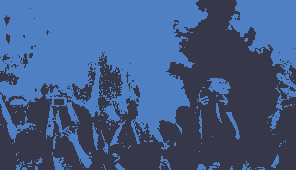

In [48]:
# Sample centers w*h times based on the labels to create clustered image
int_img = centers[labels.flatten()]
clustered_img = int_img.reshape((img_rgb.shape))
cv2_imshow(clustered_img)

# Canny edge detection

In [49]:
low_threshold = 50
kernel_size = 3
ratio = 3

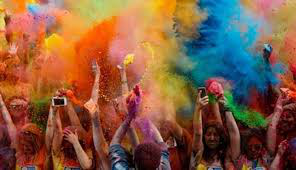

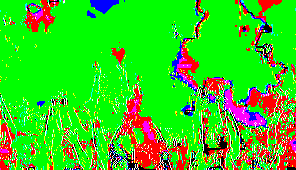

In [50]:
# Remove sections of the image that belong to cluster = 1
removed_cluster = 1
canned_img = np.copy(img_bgr).reshape((-1,3))
canned_img[labels.flatten == removed_cluster] = [0,0,0]
cv2_imshow(canned_img.reshape(img_rgb.shape))

# Detect edges
canny_img = cv2.Canny(canned_img, low_threshold, low_threshold*ratio, kernel_size)
canny_img = canny_img.reshape(img_rgb.shape)
cv2_imshow(canny_img)

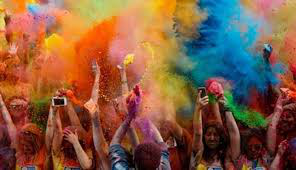

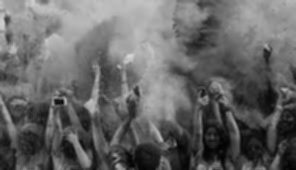

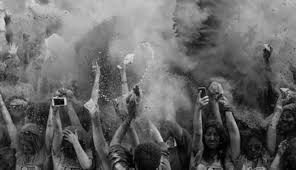

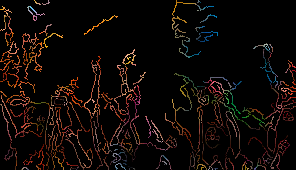

In [51]:
# https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_blur = cv2.blur(img_gray, (3,3))
detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
mask = detected_edges != 0
dst = img_bgr * (mask[:,:,None].astype(img_bgr.dtype))

cv2_imshow(img_bgr)
cv2_imshow(img_blur)
cv2_imshow(img_gray)
cv2_imshow(dst)

# Image quantification with k-means

In [52]:
from PIL import Image

In [53]:
im = Image.open('images/holi.jpeg')
print(im.format, im.size, im.mode)
im.show()

JPEG (296, 170) RGB


In [54]:
# No. of colors & pixels
def print_stats(im):
    w, h = im.size
    colors = im.getcolors(w*h)
    print(f'# of pixels:{w*h}\n# of colors:{len(colors)}')
print_stats(im)

# of pixels:50320
# of colors:44783


(170, 296, 3)


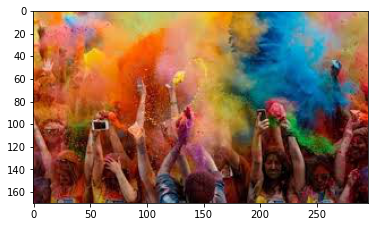

In [55]:
im_vector = np.asarray(I, dtype=np.float32)/255
print(im_vector.shape)
plt.imshow(im_vector)

In [56]:
im_vector_flat = im_vector.reshape(-1, z)
print(f'im_vector shape {im_vector.shape}\nim_vector_flat shape {im_vector_flat.shape}')

im_vector shape (170, 296, 3)
im_vector_flat shape (50320, 3)


In [57]:
# Grouping into n clusters
n_clusters = 6
k_means = KMeans(n_clusters=n_clusters)
k_means.fit(im_vector_flat)

KMeans(n_clusters=6)

im_centroid_flat shape (50320, 3)
im_centroid shape (170, 296, 3)


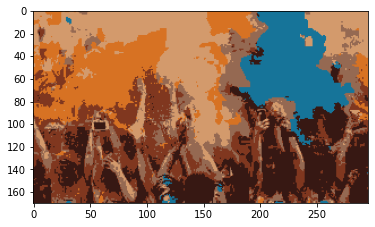

In [58]:
centroids = k_means.cluster_centers_
labels = k_means.labels_
im_centroid_flat = centroids[labels]
im_centroid = im_centroid_flat.reshape(im_vector.shape)
print(f'im_centroid_flat shape {im_centroid_flat.shape}\nim_centroid shape {im_centroid.shape}')
plt.imshow(im_centroid)